# Task 1

### Importing libs

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import requests
from bs4 import BeautifulSoup
import folium
import json
import networkx as nx
from utils import visualizers_1, preprocessing_1,computations_1

# Extracting data 

In [2]:
addresses = r'./panama_csv/panama_csv/Addresses.csv'
entities = r'./panama_csv/panama_csv/Entities.csv'
coordinates = r'./panama_csv/panama_csv/coordinates.csv'
edges = r'./panama_csv/panama_csv/all_edges.csv'
intermediaries = r'./panama_csv/panama_csv/Intermediaries.csv'
officers = r'./panama_csv/panama_csv/Officers.csv'

index_2013 = r'./the_index/the_index/index2013_data.xls'
index_2014 = r'./the_index/the_index/index2014_data.xls'
index_2015 = r'./the_index/the_index/index2015_data.xls'
index_2016 = r'./the_index/the_index/index2016_data.xls'
index_2017 = r'./the_index/the_index/index2017_data.xls'
#addresses = pd.read_csv(addresses,index_col='node_id', header=0, low_memory=False)
entities = pd.read_csv(entities, header=0, low_memory=False)
entities_c = entities.copy()

index_2013 = pd.read_excel(index_2013,index_col = 'Country Name',header=0)
index_2014 = pd.read_excel(index_2014,index_col = 'Country Name',header=0)
index_2015 = pd.read_excel(index_2015,index_col = 'Country Name',header=0)
index_2016 = pd.read_excel(index_2016,index_col = 'Country Name',header=0)
index_2017 = pd.read_excel(index_2017,index_col = 'Country Name',header=0)
#coordinates = pd.read_csv(coordinates, index_col='Country', header=0, low_memory=False)
#officers = pd.read_csv(officers, index_col='node_id', header=0, low_memory=False)
#intermediaries = pd.read_csv(intermediaries, index_col='node_id', header=0, low_memory=False)
#edges = pd.read_csv(edges,header=0, low_memory=False)

## Explaining the data:

<h1><center>**~~ Panama Papers ~~**</center></h1>

**Introduction: ** 

This database contains information on almost 500,000 offshore entities that are part of the Panama Papers, the Offshore Leaks and the Bahamas Leaks investigations. The data covers nearly 40 years – from 1977 through to early 2016 – and links to people and companies in more than 200 countries and territories. The real value of the database is that it strips away the secrecy that cloaks companies and trusts incorporated in tax havens and exposes the people behind them. This includes, when available, the names of the real owners of those opaque structures.

The dataset is divided into 5 **main** csv files :
* Addresses
* Edges
* Entities
* Intermediaries
* Officers

In this project we are focusing on the relationships between the countries involved.Briefly here is the list of our research questions.

1. How the number of offshores that are founded from an origin country in tax havens is related to economical factors of the origin country?
2. Which roles does the legal situation in the origin country play compared to the legal situation in the offshore country?
3. How are the countries connected? Is there a pattern in the way players in origin counrties select special countries for their offshores.
4. There is a hypothesis that scandals involving tax havens actually help to promote creating offshores there. Can we find evidence for this in the data?

To look through those questions into more details, we use the **csv** file named **Entities** which contains the connections between the origin and tax haven countries and use the help of the dataset **Index Of Economics Freedom** to understand the economical/legal parameters of each country.

<h1><center>**~~ Index Of Economics Freedom ~~**</center></h1>

**Introduction:**

Economic freedom is the fundamental right of every human to control his or her own labor and property. In an economically free society, individuals are free to work, produce, consume, and invest in any way they please. In economically free societies, governments allow labor, capital, and goods to move freely, and refrain from coercion or constraint of liberty beyond the extent necessary to protect and maintain liberty itself. The Index covers 12 economic freedoms, objective measurements, historical background, and policy analysis of 186 economies troughout the world. The 12 economic freedoms are grouped into four pillars of economic freedom:

**1. Rule of law:**

 * **Property rights:** is an assessment of the ability of individuals to accumulate private property, secured by clear laws that are fully enforced by the state. It measures the degree to which a country’s laws protect private property rights and the degree to which its government enforces those laws.
 * **Government integrity:** "Corruption" is the abuse of entrusted power for private gain. It can be classified as grand, petty and political, depending on the amounts of money lost and the sector where it occurs.
 * **Judicial effectiveness: ** Well-functioning civil justice systems protect the rights of all citizens against infringement of the law by others, including by powerful parties and governments. An essential component of the rule of law is indeed based on effective and fair judicial systems to ensure that the laws are respected and appropriate sanctions are taken when they are violated.
 
**2. Government Size:**

 * **Government spending:** Considers the level of government expenditures as a percentage of GDP. General government expenditure data include all levels of government such as federal, state, and local. Research have shown that excessive government spending that causes chronic budget deficits and the accumulation of sovereign debt is one of the most serious drags on economic dynamism.
 * **Tax burden:** is a measure of the tax burden imposed by government. It includes direct taxes, in terms of the top marginal tax rates on individual and corporate incomes, and overall taxes, including all forms of direct and indirect taxation at all levels of government, as a percentage of GDP.
 * **Fiscal health:** A government’s budget is one of the clearest indicators of the extent to which it respects the principle of limited government. Widening deficits and a growing debt burden, both of which are direct consequences of poor government budget management, lead to the erosion of a country’s overall fiscal health.
 
**3. Regulatory Efficiency:**

 * **Business freedom:**  is an overall indicator of the efficiency of government regulation of business. Individual’s ability to establish and run an enterprise without undue interference from the state is one of the most fundamental indicators. It is formed from several factors:
   * Starting a business [ Procedure / Time / Cost / Minimum capital ]
   * Obtaining a license [ Procedure / Time / Cost ]
   * Closing a business [ Time / Cost / Recovery rate ]
 * **Labor freedom:**  is a quantitative measure that considers various aspects of the legal and regulatory framework of a country’s labor market, including regulations concerning minimum wages, laws inhibiting layoffs, severance requirements, and measurable regulatory restraints on hiring and hours worked.
 * **Monetary freedom:**  combines a measure of price stability with an assessment of price controls. Both inflation and price controls distort market activity. Price stability without microeconomic intervention is the ideal state for the free market.
 
**4. Open Markets:**

 * **Trade freedom:**  is a composite measure of the absence of tariff and non-tariff barriers that affect imports and exports of goods and services.The trade freedom score is based on two inputs:
   * The trade-weighted average tariff rate.
   * Non-tariff barriers (NTBs). The categories considered are:
     * Quantity restrictions.
     * Price restrictions.
     * Regulatory restrictions.
     * Customs restrictions.
     * Investment restrictions.
     * Direct government intervention.
 * **Investment freedom:** Describes the constraints on the flow of investment capital. Individuals and firms would be allowed to move their resources into and out of specific activities, both internally and across the country’s borders, without restriction. Countries have different rules for foreign and domestic investment; some restrict access to foreign exchange; some impose restrictions on payments, transfers, and capital transactions; in some, certain industries are closed to foreign investment. Labor regulations, corruption, red tape, weak infrastructure, and political and security conditions can also affect the freedom that investors have in a market.
 * **Financial freedom:** is a measure of banking efficiency as well as a measure of independence from government control and interference in the financial sector. It is calculated by looking at those broad areas:
   * The extent of government regulation of financial services.
   * The degree of state intervention in banks and other financial firms through direct and indirect ownership.
   * The extent of financial and capital market development.
   * Government influence on the allocation of credit.
   * Openness to foreign competition.


Add the monetary measures

In [3]:
# As shown above, the features of the index of economical freedom
# are divided into 5 categories.

# Here is the division of the categories we discussed earlier.
open_markets_data = ['Trade Freedom','Investment Freedom ','Financial Freedom']
regulatory_efficiency_data = ['Business Freedom','Labor Freedom','Monetary Freedom']
rule_of_law_data = ['Property Rights','Government Integrity','Judical Effectiveness']
government_size_data = ['Gov\'t Spending','Fiscal Health','Tax Burden']
economical_data = ['GDP (Billions, PPP)','GDP Growth Rate (%)','GDP per Capita (PPP)'\
                   ,'Gov\'t Expenditure % of GDP ','Inflation (%)',\
                   'FDI Inflow (Millions)','Public Debt (% of GDP)']
# Years.
years = ['2017', '2016', '2015', '2014','2013']

### Cleaning the datasets and concatenating them into a single dataframe.

In [4]:
# Cleaning process.
index_2013 = preprocessing_1.cleaning_index_data(index_2013,'2012')
index_2014 = preprocessing_1.cleaning_index_data(index_2014,'2013')
index_2015 = preprocessing_1.cleaning_index_data(index_2015,'2014')
index_2016 = preprocessing_1.cleaning_index_data(index_2016,'2015')
index_2017 = preprocessing_1.cleaning_index_data(index_2017,'2016')
# Concatenating all the datasets.
economical_indexes = pd.concat([index_2017,index_2016,index_2015,index_2014,index_2013])

In [5]:
jurisdiction_country = computations_1.jurisdiction_country_data(entities,500,500,0)
jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,0)
total_jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,1)

### Total jurisdiction count with unavailable data.

##### In here we will visualize the total number of offshore accounts opened in the Tax haven countries. Including the ones where the origin country is missing.
##### The goal is to visualize the total number of accounts created regardless if the origin country data is present.

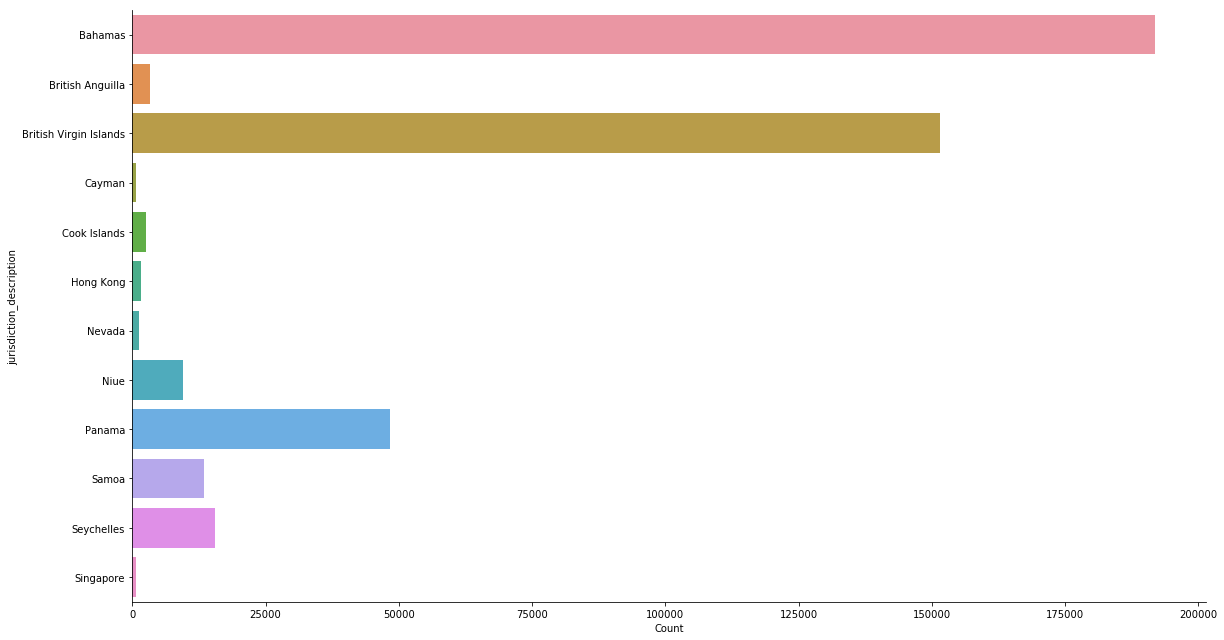

In [6]:
visualizers_1.visualize_jurisdiction_count(total_jurisdiction_count)

### Those we have data about 

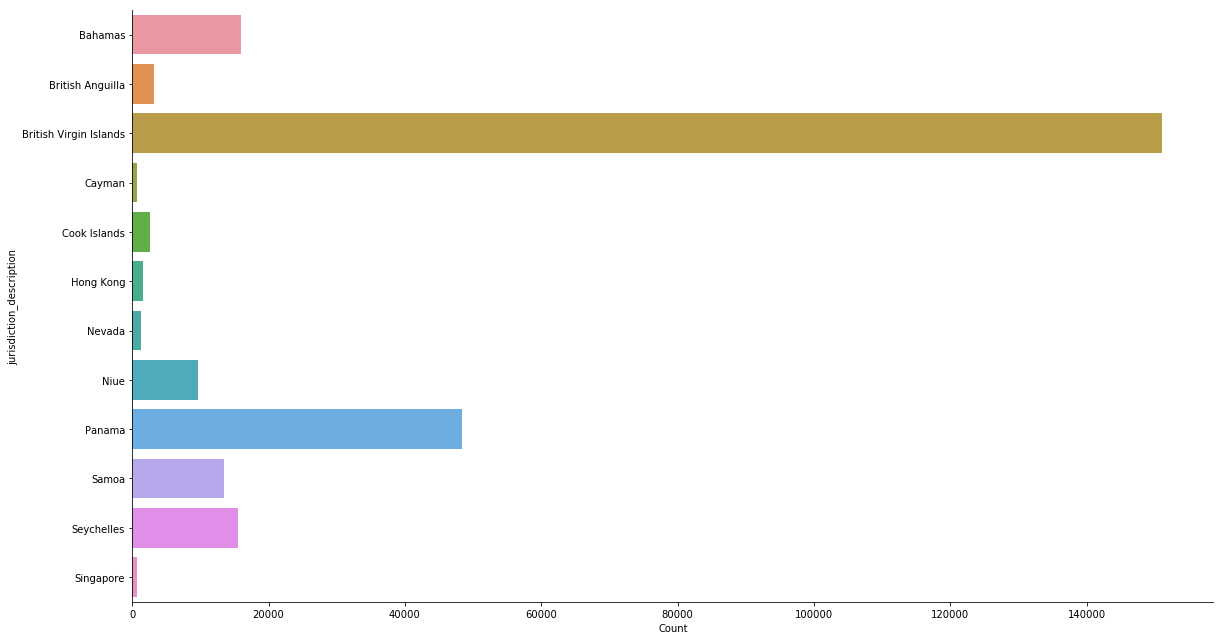

In [7]:
visualizers_1.visualize_jurisdiction_count(jurisdiction_count)

##### We can see that there is huge amount of missing data from the Bahamas, specifically what are the countries involved. However this still indicates that the Bahamas is a favourable Tax Haven country and will be included in the analysis further on.

### Countries involved
##### In here we will visualize the total number of offshore accounts opened by each country in the dataset.

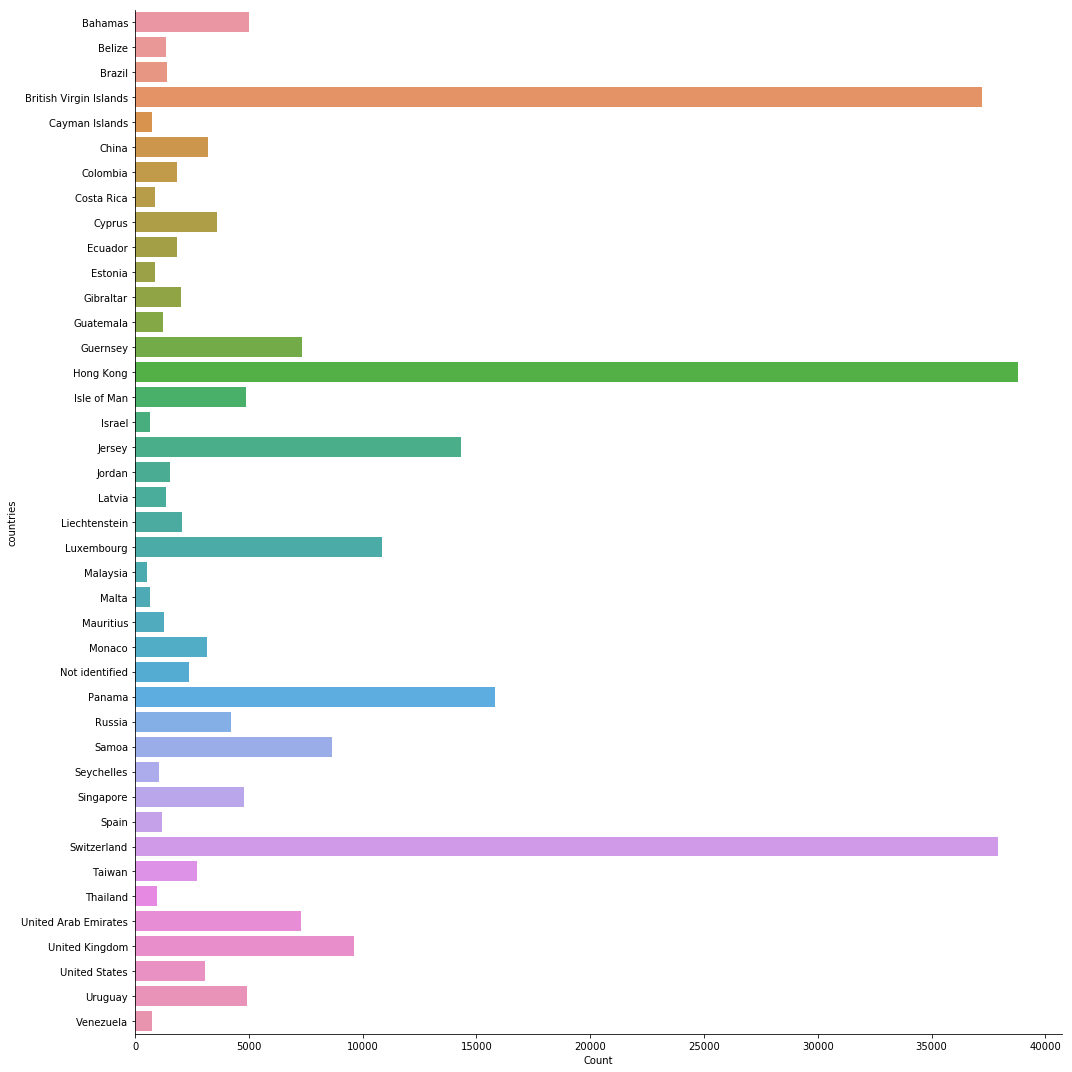

In [8]:
visualizers_1.visualize_country_count(jurisdiction_count)

##### We can notice from the countries listed, some Tax Haven countries are included, this will be investigated more in the section below.

### Countries most involved in opening offshore accounts.
##### From the visualization above we can extract the countries that are in our opinion worth investigating.

In [9]:
countries = ['Bahamas','Cyprus','Isle of Man','Jersey','Luxembourg','Panama',\
             'Russia','Switzerland','Taiwan','United Arab Emirates','United Kingdom',\
            'United States','Hong Kong','British Virgin Islands','Guernsey','Singapore',\
            'China','Liechtenstein','Uruguay','Latvia','Monaco','Gibraltar']

##### In here we are visualizing the distribution of the entities from the origin countries in the Tax Haven countries. This analysis will be carried on further in the coming sections

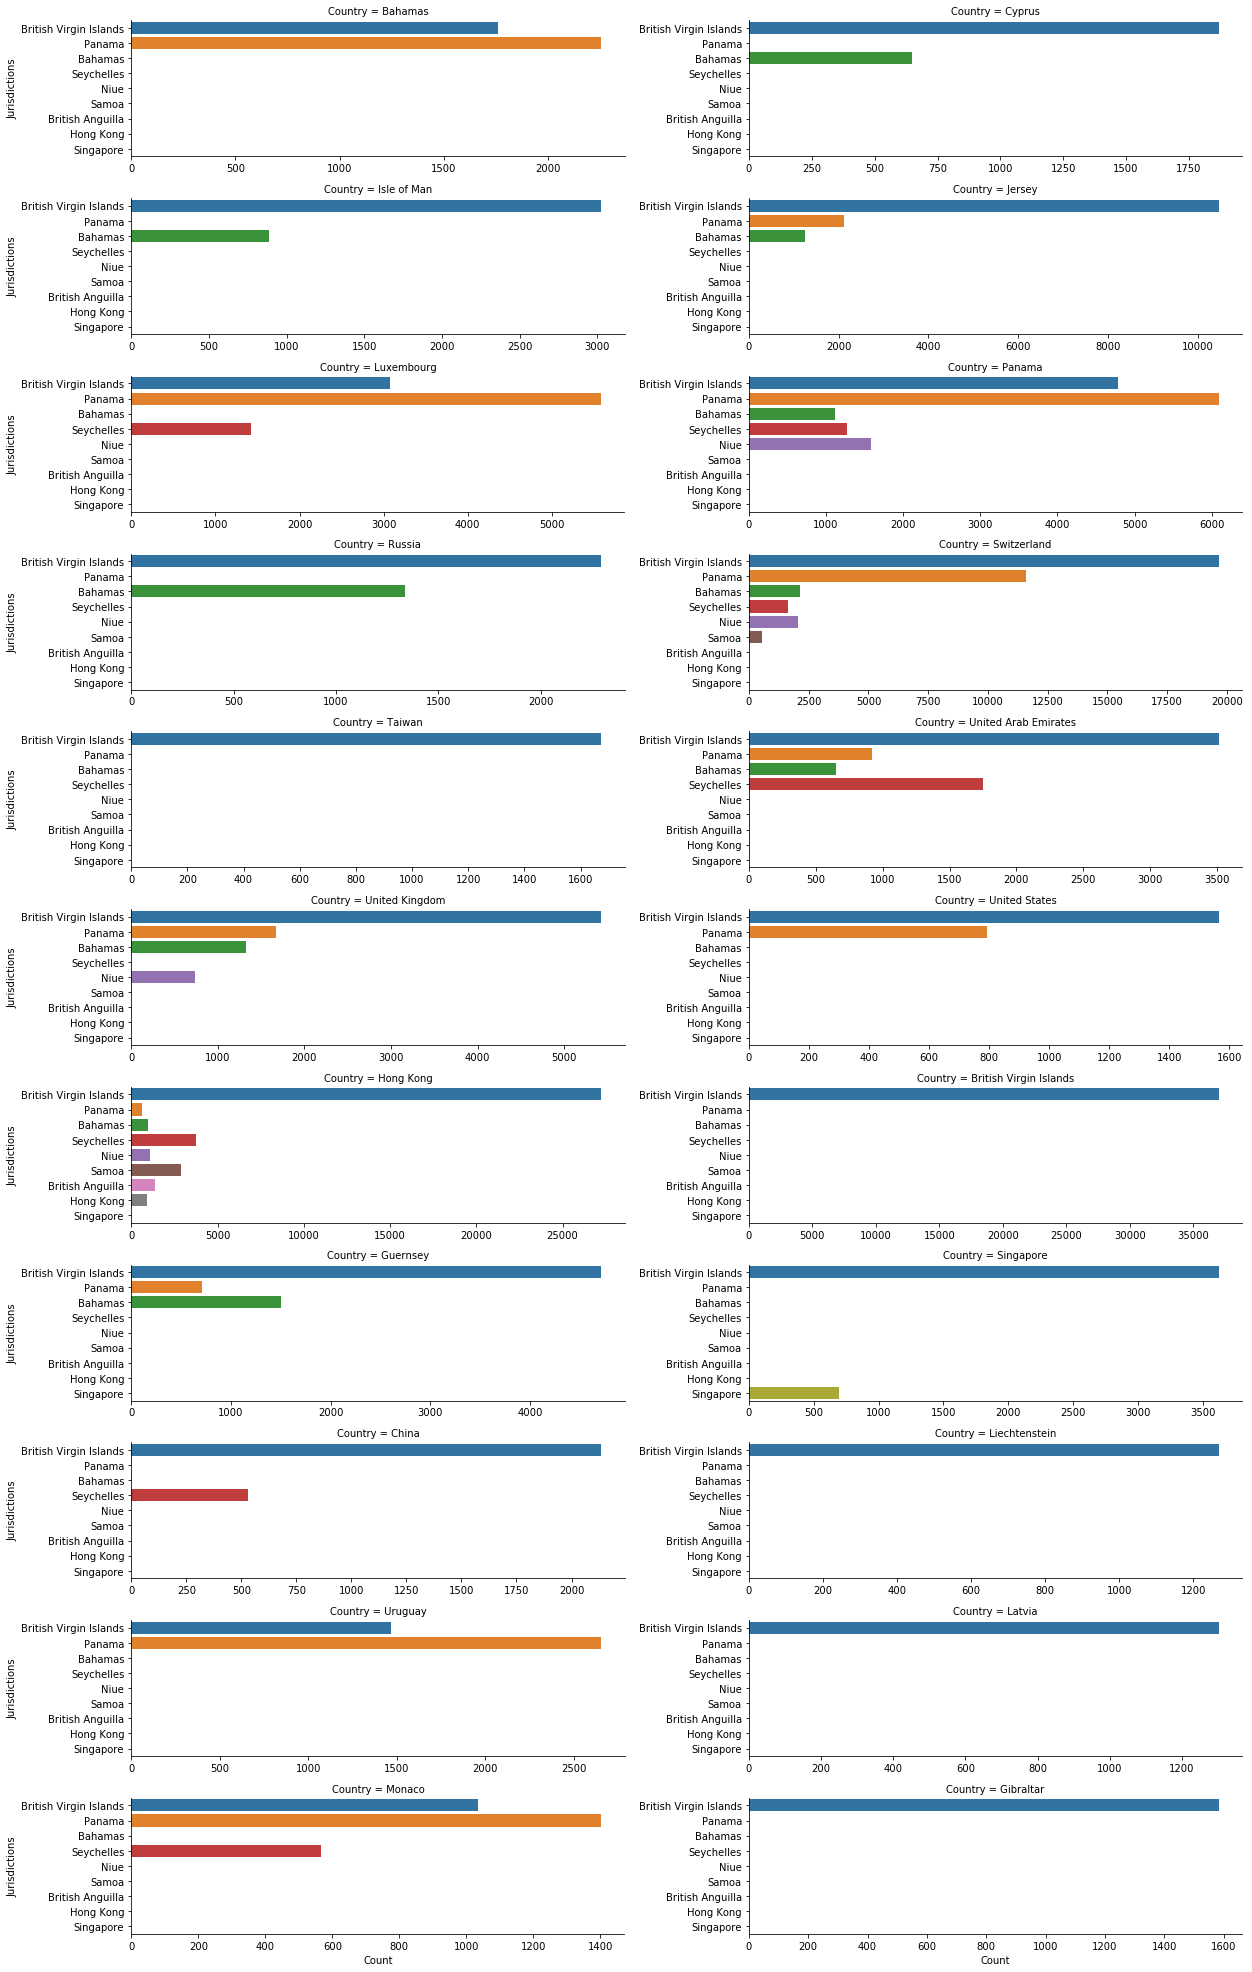

In [10]:
visualizers_1.visualize_specific_count(countries,jurisdiction_country)

We have 40 countries in the database which are considered as jurisdiction countries or may be considered as the Tax Haven Countries. From those we will investigate only the countries with more than 500 Offshore accounts.

Most important countries to be investigated:
* Switzerland
* Hong Kong 
* United Kingdom
* United Arab Emirates
* Luxembourg

### Comparing several economical factors between the most involved countries

## Extracting information from Economic Index based on column name

In [11]:
# Top countries involved.
lead_countries=['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg']
# Tax havens that we have data about in the economics index with most number of offshore entities.
# Write why we don't have about others ?
haven_countries = ['Panama','Bahamas','Samoa','Seychelles']
# Both top countries and Tax Havens.
both_countries = ['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg','Panama','Bahamas','Samoa','Seychelles']

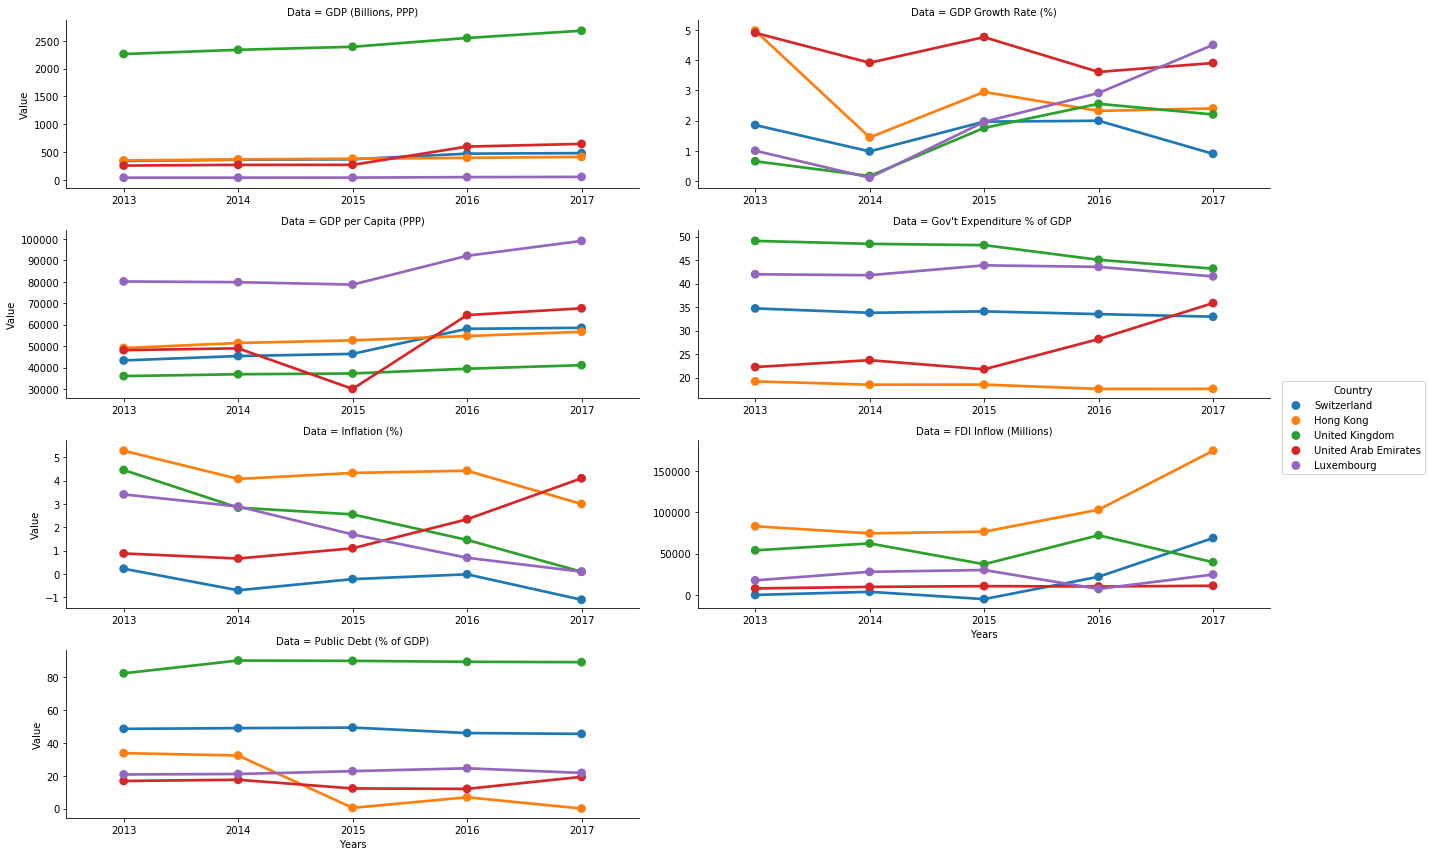

In [12]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,economical_data,years)

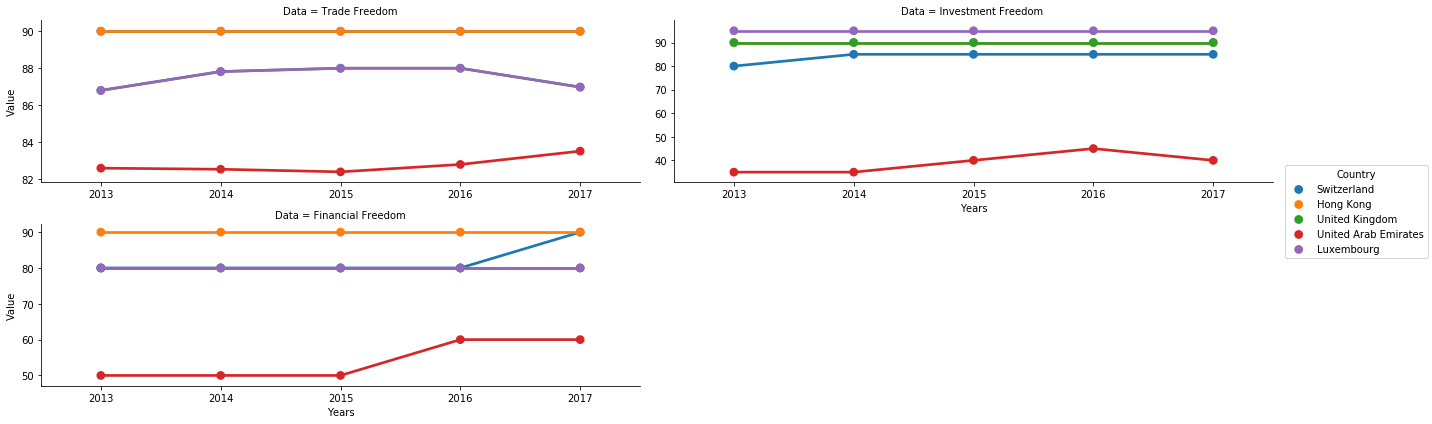

In [13]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,open_markets_data,years)

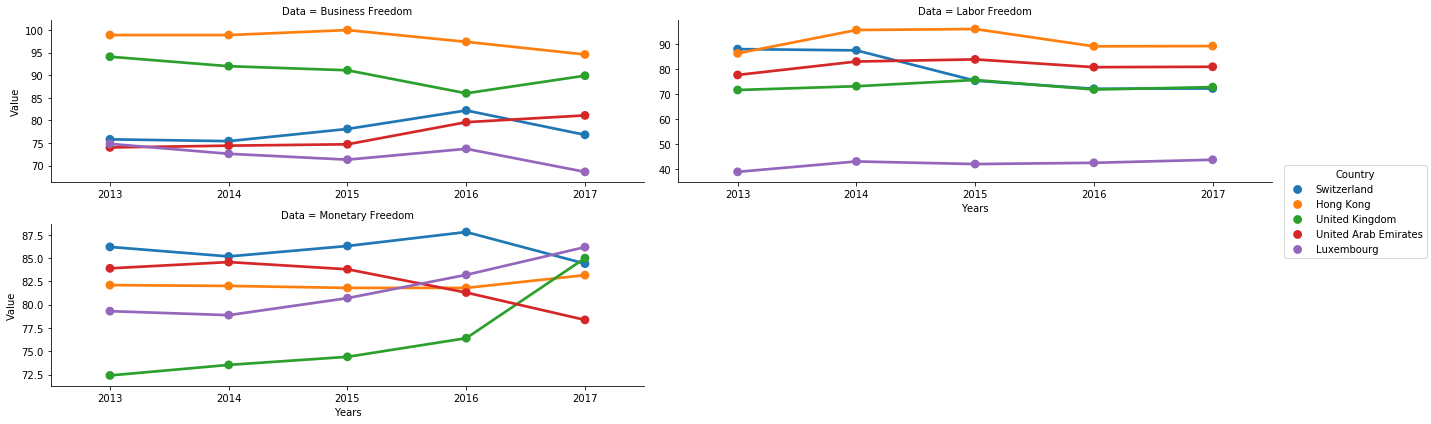

In [14]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,regulatory_efficiency_data,years)

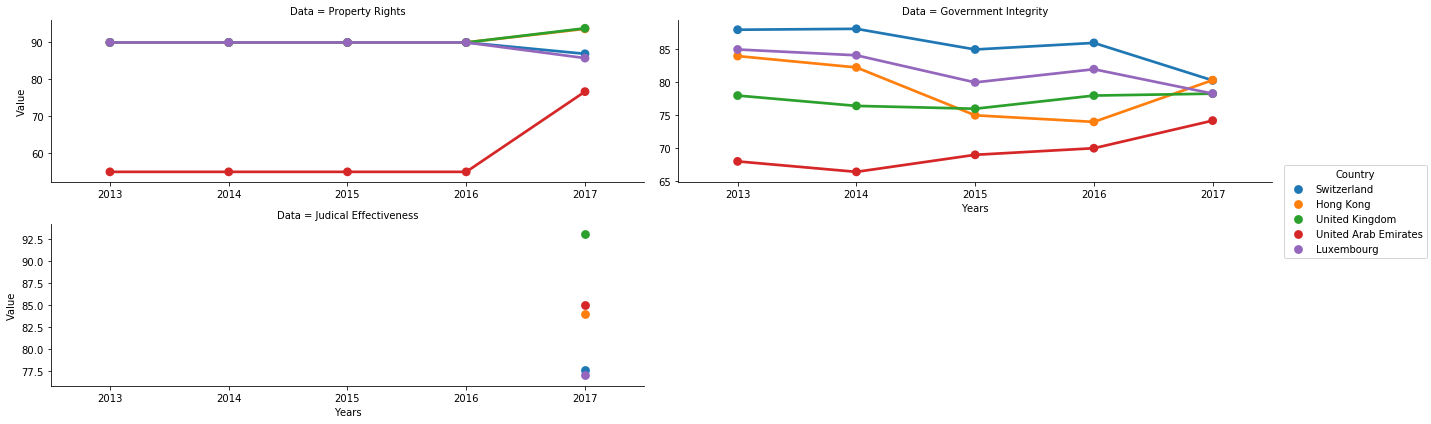

In [15]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,rule_of_law_data,years)

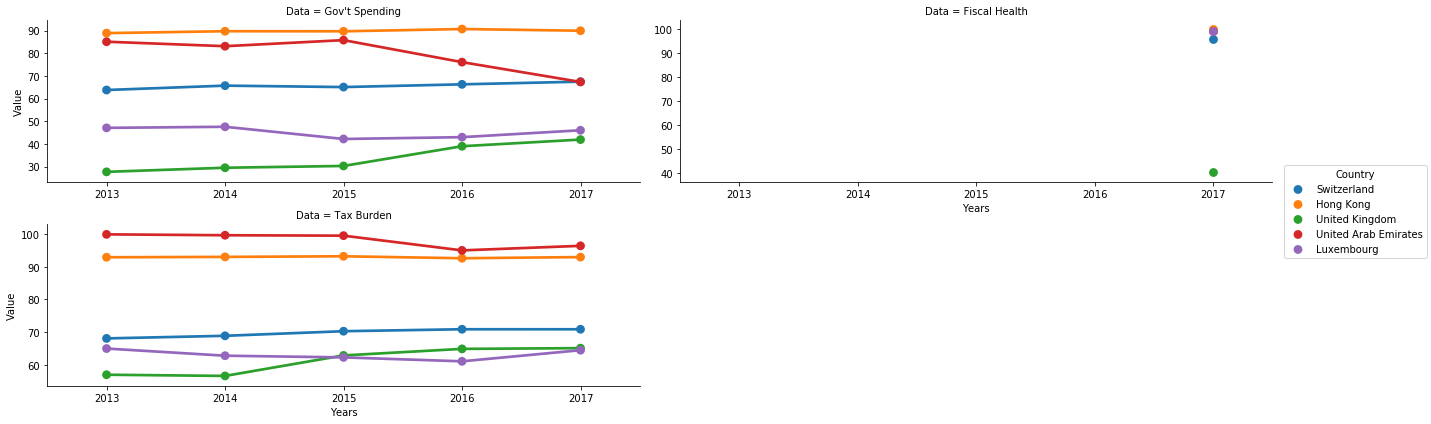

In [16]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,government_size_data,years)

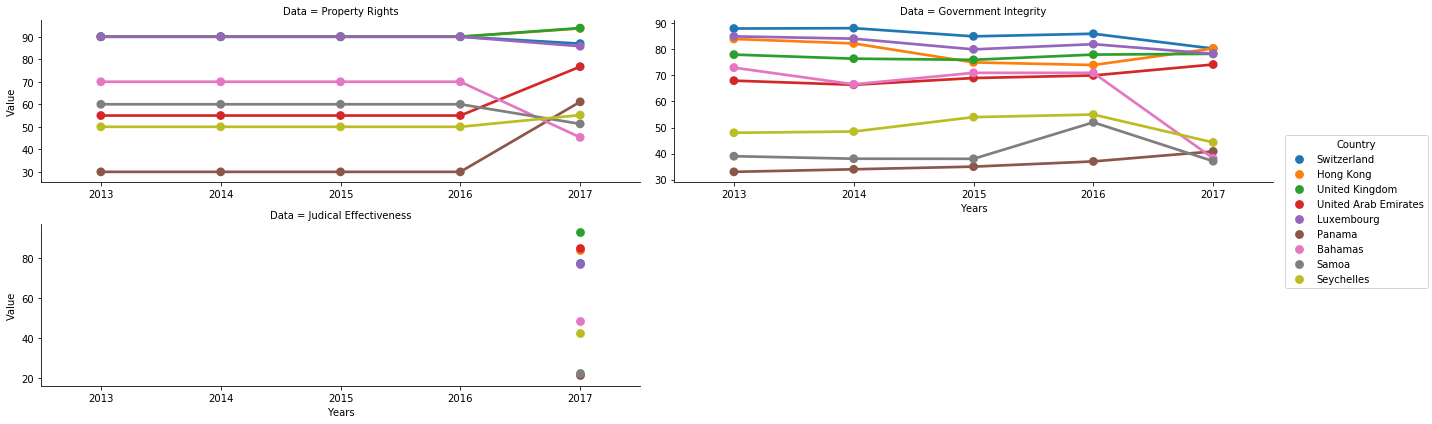

In [17]:
visualizers_1.visualizing_index_data(economical_indexes,both_countries,rule_of_law_data,years)

### Visualizing the correlation of features between the involved countries.

In [18]:
countries_involved = computations_1.compute_countries_involved(jurisdiction_country,0)
countries_involved_data = computations_1.compute_countries_involved_data(index_2017,countries_involved)

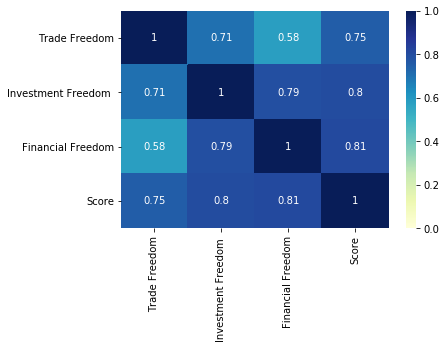

In [19]:
visualizers_1.visualize_feature_correlation(countries_involved_data,open_markets_data)

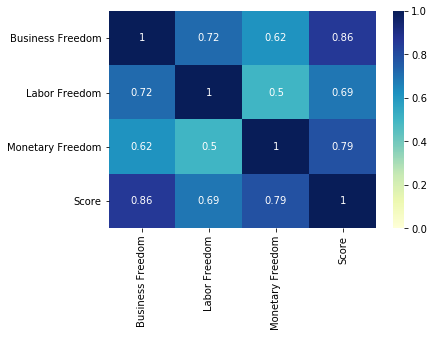

In [20]:
visualizers_1.visualize_feature_correlation(countries_involved_data,regulatory_efficiency_data)

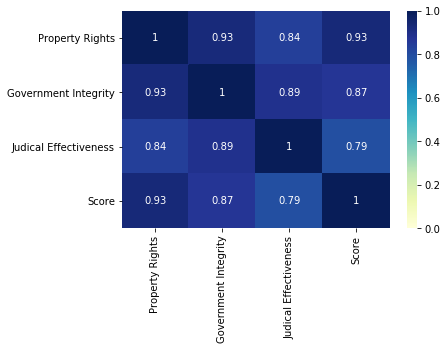

In [21]:
visualizers_1.visualize_feature_correlation(countries_involved_data,rule_of_law_data)

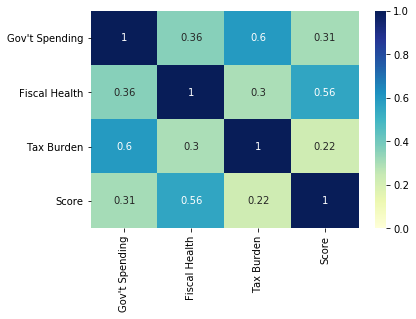

In [22]:
visualizers_1.visualize_feature_correlation(countries_involved_data,government_size_data)

In [ ]:
#Nan_countries_values = collections.Counter(entities.loc[entities['countries'].isnull()]['jurisdiction_description'])
#not_Nan_countries_values = collections.Counter(entities.loc[entities['countries'].notnull()]['jurisdiction_description'])
#jurisdiction_country.iloc[jurisdiction_country.index.get_level_values('jurisdiction_description') == 'Wyoming']
#counter = collections.Counter(entities.loc[:,'countries'])